In [1]:
import pickle as pkl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

pd.set_option('display.max_columns', 500)

%matplotlib inline

C:\Users\Omar-Bouj\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


The data is presented in 3 main dataframes :
- Course Details
- Course Syllabi
- Course Reviews

##### CourseDetails

In [2]:
with open('Raw Data/course_details_df.pkl', 'rb') as f:
    course_details = pkl.load(f)

##### CourseSyllabi

In [3]:
with open('Raw Data/course_syllabi_df.pkl', 'rb') as f:
    course_syllabi = pkl.load(f)

##### CourseReviews

In [4]:
with open('Raw Data/course_reviews_df.pkl', 'rb') as f:
    course_reviews = pkl.load(f)

## Data exploration

##### CourseDetails

In [5]:
course_details.head(3)

,avg_rating,avg_rating_recent,content_info,created,is_paid,last_update_date,num_published_lectures,num_published_practice_tests,num_published_quizzes,num_reviews,num_reviews_recent,num_subscribers,objectives,prerequisites,price,published_time,quality_status,rating_distribution,status_label,target_audiences,title,url,course_type,content_length,publication_gap
id,,,,,,,,,,,,,,,,,,,,,,,,,
8082,4.38095,4.34115,6 hours,2011-06-14 16:09:14,True,2015-10-15,56,0,5,620,18,28367,[Hours of video lectures detailing the ten ste...,[],$74.99,2011-07-08 21:32:55,approved,"[{'count': 6, 'rating': 1}, {'count': 19, 'rat...",Live,[],Ruby Programming for Beginners,/learn-ruby-programming-in-ten-easy-steps/,course,6.0,0.066369
8203,3.45000,3.73183,1 hour,2011-06-20 19:59:32,True,2017-07-10,15,0,1,12,10,1550,"[In this course, you will learn how to build a...",[PC or MAC with a browser installed],$99.99,2011-06-20 17:48:46,approved,"[{'rating': 1, 'count': 2}, {'rating': 2, 'cou...",Live,[This course is intended for those who have ba...,Basic and Advanced HTML Lessons,/learn-html-in-24-hours/,course,1.0,-0.000249
8319,3.60000,3.79901,7.5 hours,2011-06-28 04:48:38,True,NaT,31,0,0,12,10,290,"[The normal Git workflow, How to collaborate w...",[],$19.99,2011-07-29 20:24:56,approved,"[{'rating': 1, 'count': 2}, {'rating': 2, 'cou...",Live,[],Git Basics: In Theory and Practice,/git-in-theory-and-in-practice/,course,7.5,0.086713


##### Remove the column course type, redundant : all rows have value 'course' :

In [6]:
course_details['course_type'].value_counts()

course    9718
Name: course_type, dtype: int64

In [7]:
course_details.drop('course_type', axis=1, inplace=True)

###### Deleting the only in review course as it has no subscribers and no reviews, and deleting the columns 'quality_status' and 'status label' as all other courses have qualitystatus 'approved'  and statuslabel 'Live':

In [8]:
course_details[course_details['quality_status']=='in_review']

,avg_rating,avg_rating_recent,content_info,created,is_paid,last_update_date,num_published_lectures,num_published_practice_tests,num_published_quizzes,num_reviews,num_reviews_recent,num_subscribers,objectives,prerequisites,price,published_time,quality_status,rating_distribution,status_label,target_audiences,title,url,content_length,publication_gap
id,,,,,,,,,,,,,,,,,,,,,,,,
1965490,0.0,0.0,5 hours,2018-10-14 07:14:01,True,2019-01-10,17,0,0,0,0,0,"[design and develop highly modular, flexible, ...","[object oriented programming and design, basic...",$199.99,2018-12-01 00:37:41,in_review,"[{'rating': 1, 'count': 0}, {'rating': 2, 'cou...",In review,"[software developers, software architects, IT ...",Java Modularity Mastercourse in Enterprise Sof...,/java-modularity-in-enterprise-software-design/,5.0,0.130753


In [9]:
# delete the row
course_details = course_details[course_details['quality_status']!='in_review']

# delete the columns
course_details.drop(['quality_status','status_label'], axis = 1, inplace = True)



###### Discarding the 'content_info' column , as the same information is available in the column 'course_length' :

In [10]:
CI_is_timedelta = course_details['content_info'].apply(lambda row : ('hour' in row) or ('min' in row))

#Indeed, they are all timedeltas
CI_is_timedelta.value_counts()

True    9717
Name: content_info, dtype: int64

In [11]:
course_details.drop('content_info', axis=1, inplace=True)

In [12]:
course_details.head(3)

,avg_rating,avg_rating_recent,created,is_paid,last_update_date,num_published_lectures,num_published_practice_tests,num_published_quizzes,num_reviews,num_reviews_recent,num_subscribers,objectives,prerequisites,price,published_time,rating_distribution,target_audiences,title,url,content_length,publication_gap
id,,,,,,,,,,,,,,,,,,,,,
8082,4.38095,4.34115,2011-06-14 16:09:14,True,2015-10-15,56,0,5,620,18,28367,[Hours of video lectures detailing the ten ste...,[],$74.99,2011-07-08 21:32:55,"[{'count': 6, 'rating': 1}, {'count': 19, 'rat...",[],Ruby Programming for Beginners,/learn-ruby-programming-in-ten-easy-steps/,6.0,0.066369
8203,3.45000,3.73183,2011-06-20 19:59:32,True,2017-07-10,15,0,1,12,10,1550,"[In this course, you will learn how to build a...",[PC or MAC with a browser installed],$99.99,2011-06-20 17:48:46,"[{'rating': 1, 'count': 2}, {'rating': 2, 'cou...",[This course is intended for those who have ba...,Basic and Advanced HTML Lessons,/learn-html-in-24-hours/,1.0,-0.000249
8319,3.60000,3.79901,2011-06-28 04:48:38,True,NaT,31,0,0,12,10,290,"[The normal Git workflow, How to collaborate w...",[],$19.99,2011-07-29 20:24:56,"[{'rating': 1, 'count': 2}, {'rating': 2, 'cou...",[],Git Basics: In Theory and Practice,/git-in-theory-and-in-practice/,7.5,0.086713


In [13]:
course_details.shape

(9717, 21)

CourseDetails dataframe contains the list of the courses explored in this study, each row representing one distinct course.  and all courses in the dataset are IC-CS courses:

The dataframe has 21 columns for 9717 records.

- **avg_rating** : Average rating ( from 1 to 5)
- **avg_rating_recent** : Average rating obtained on a recent set of ratings (? : over the last 100 ratings ? over the last year ?)
- **created**: Date and time of creation of the course 
- **is_paid** : Boolean, True if the course has a price, ie not for free 
- **last_update_date** : Last modification to the course
- **num_published_lectures** : Number of lectures (?: what exactly is a lecture)
- **num_published_practice_test** : Number of published practice tests
- **num_published_quizzes** : Number of puclished quizzes
- **num_reviews** : Number of total reviews
- **num_reviews_recent** : Number of recent reviews
- **num_subscribers** : Number of overall subscribers
- **objectives** : List of sentences describing the goal of the course
- **prerequisites** : List of knowledge or material needed to take the course
- **price** : String, the price in dollars, or 'Free' if the course is not paid
- **published_time** : First date the course was published 
- **rating_distribution** : Dict of each rating and its count (1 to 5)
- **target_audiences** : List of sentences describing the audience it was made for and what they can find in this course
- **title** : String, Title of the course
- **url** : String, url of the course at Udemy website
- **content_length** : Duration of the course in hours
- **publication_gap** : The time between course creation and course publication, course publication means going online

In [14]:
# write to preprocessed data folder
course_details.to_pickle('Preproccessed Data/course_details.pkl')

##### CourseSyllabi

**Courses** are a **collection of chapters**, and **chapters** are **collection of quizzes, lectures, and practices**.

In [15]:
course_syllabi = course_syllabi.apply(lambda col : col.apply(lambda row : np.nan if row =='' or row is None else row))
course_syllabi.head(3)

,course_id,chapter_title,chapter_description,chapter_created,content_class,title,description,created_content,is_published,content_summary,url,created_course,published_time,age_from_creation,age_from_publication
0,8082,NaN,NaN,NaT,course,Ruby Programming for Beginners,NaN,2011-06-14 16:09:14,NaN,NaN,/learn-ruby-programming-in-ten-easy-steps/,2011-06-14 16:09:14,2011-07-08 21:32:55,0.000000,-0.066369
1,8082,NaN,NaN,NaT,chapter,Introduction,NaN,2011-06-17 21:36:49,True,NaN,NaN,2011-06-14 16:09:14,2011-07-08 21:32:55,0.008842,-0.057527
2,8082,Introduction,NaN,2011-06-17 21:36:49,lecture,Ruby Programming for Beginners - Intro,NaN,2012-02-17 17:57:19,True,01:55,/learn-ruby-programming-in-ten-easy-steps/lear...,2011-06-14 16:09:14,2011-07-08 21:32:55,0.679658,0.613288


We now investigate the presence of null values.

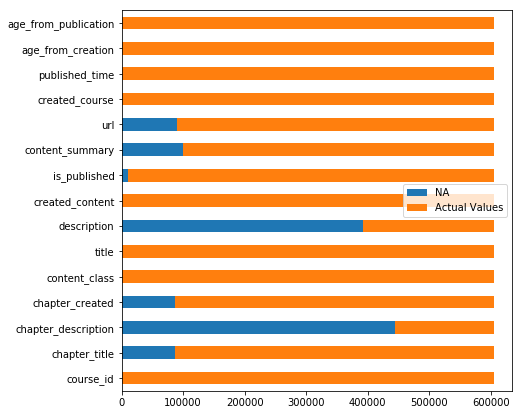

In [16]:
df = pd.concat([course_syllabi.isna().sum(), course_syllabi.shape[0]-course_syllabi.isna().sum()], axis=1)
df.rename(columns={0:'NA', 1:'Actual Values'},inplace=True)
df.plot.barh(stacked=True, figsize=(7,7))

In [17]:
course_syllabi.head()

,course_id,chapter_title,chapter_description,chapter_created,content_class,title,description,created_content,is_published,content_summary,url,created_course,published_time,age_from_creation,age_from_publication
0,8082,NaN,NaN,NaT,course,Ruby Programming for Beginners,NaN,2011-06-14 16:09:14,NaN,NaN,/learn-ruby-programming-in-ten-easy-steps/,2011-06-14 16:09:14,2011-07-08 21:32:55,0.000000,-0.066369
1,8082,NaN,NaN,NaT,chapter,Introduction,NaN,2011-06-17 21:36:49,True,NaN,NaN,2011-06-14 16:09:14,2011-07-08 21:32:55,0.008842,-0.057527
2,8082,Introduction,NaN,2011-06-17 21:36:49,lecture,Ruby Programming for Beginners - Intro,NaN,2012-02-17 17:57:19,True,01:55,/learn-ruby-programming-in-ten-easy-steps/lear...,2011-06-14 16:09:14,2011-07-08 21:32:55,0.679658,0.613288
3,8082,Introduction,NaN,2011-06-17 21:36:49,lecture,Welcome To Ruby Programming In Ten Easy Steps,"<p style=""""> \t Welcome to the course! This is...",2014-04-18 17:44:49,True,07:40,/learn-ruby-programming-in-ten-easy-steps/lear...,2011-06-14 16:09:14,2011-07-08 21:32:55,2.846757,2.780388
4,8082,Introduction,NaN,2011-06-17 21:36:49,lecture,The Little Book Of Ruby,"<p> \t<strong style="""">The Little Book Of Ruby...",2015-07-12 11:13:02,True,101 pages,/learn-ruby-programming-in-ten-easy-steps/lear...,2011-06-14 16:09:14,2011-07-08 21:32:55,4.078889,4.012519


Each row from the syllabi represent a part of a course (a video, a quizz, a practice or can be course title or chapter title) from any course, the dataframe has 15 columns for 604.683 rows.

- **course_id** : the course this video is related to
- **chapter_tiltle** : chapter where the content is included, if the line is a chapter or a course, this field is NaN
- **chapter_description** : chapter description, mostly empty
- **chapter_created** : time of creation of chapter, NaN if the line is course or chapter
- **content_class** : if the row islecture quir,pratice,chapter,or course
- **title** :
- **description** : description, only course have no description, rest is mostly empty
- **created_content** : time of creation
- **is_published** : is published, either True, or Nan
- **content_summary** : duration if video, size if file, or  pages if document
- **url** : 
- **created_course**:
- **published_time**:
- **age_from_creation** :
- **age_from publication**:

In [18]:
# write to preprocessed data folder
course_syllabi.to_pickle('Preproccessed Data/course_syllabi.pkl')

##### Course_reviews

In [19]:
course_reviews.head()

,course_id,created_date,rating,text
0,8082,2019-04-20T16:54:16Z,4.5,
1,8082,2019-04-19T06:00:18Z,5.0,
2,8082,2019-04-01T18:15:31Z,5.0,
3,8082,2019-03-28T15:04:02Z,3.5,Editing my review as I go through the lessons....
4,8082,2019-02-21T14:34:18Z,5.0,


In [20]:
course_reviews.dtypes

course_id         int64
created_date     object
rating          float64
text             object
dtype: object

In [21]:
course_reviews.shape

(2762845, 4)

In [22]:
# setting date col to datetime format
course_reviews['created_date']= pd.to_datetime(course_reviews['created_date'])

# a few ratings are 3.3, 4.9, we round all to closest 0.5
course_reviews['rating'] = course_reviews['rating'].apply(lambda x : round(x*2)/2)

# add proper nan instead of empty string
course_reviews['text'] = course_reviews['text'].apply(lambda x : np.nan if x=='' else x)

course_reviews.head()

,course_id,created_date,rating,text
0,8082,2019-04-20 16:54:16,4.5,NaN
1,8082,2019-04-19 06:00:18,5.0,NaN
2,8082,2019-04-01 18:15:31,5.0,NaN
3,8082,2019-03-28 15:04:02,3.5,Editing my review as I go through the lessons....
4,8082,2019-02-21 14:34:18,5.0,NaN


**Note :**  the values are slightly different from the first dataframe 'course_Details' , which is probably due to rounding the ratings :

In [23]:
pd.concat([course_reviews.groupby(by='course_id').mean(),course_details['avg_rating']], axis=1).head()

,rating,avg_rating
8082,4.346400,4.38095
8203,3.458333,3.45000
8319,3.333333,3.60000
8324,4.202811,3.95000
8325,4.432292,4.65000


In [24]:
# write to preprocessed data folder
course_reviews.to_pickle('Preproccessed Data/course_reviews.pkl')